<a href="https://colab.research.google.com/github/Vinitladse/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Vinit_Ladse_(_Self_)YES_BANK_STOCK_CLOSING_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **YES BANK STOCK CLOSING PRICE PREDICTION**

#### Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.








##### Perform regression analysis using multiple models to predict the closing price of the stock and compare the evaluation metrics for all of them to find the best model.

In [1]:
# Importing The Libraries
import pandas as pd
import numpy as np
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mount Drive
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [3]:
# Importing the dataset
Dataset = pd.read_csv("/content/drive/MyDrive/dataset/data_YesBank_StockPrices.csv")

# **Description Of Data**

In [4]:
# Here showing in Dataset the Upper rows by using head() method 
Dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [5]:
# Here showing in Dataset the Last Five rows by using tail() method
Dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [6]:
# Describe():- The describe() method computes and displays summary statistics for a Python dataframe.
Dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [7]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


##### There are multiple variable in the dataset - Date, Open, High and close The columns Open and Close represent the starting and final price.   
##### * The High, Low variable are represent the maximum and minimum.
          
  

In [8]:
# list of Columns in the datasets
list(Dataset.columns)

['Date', 'Open', 'High', 'Low', 'Close']

In [9]:
# Find out the size of the yes bank stock closing price prediction csv by using shape function
Dataset.shape

(185, 5)

##### Dataset we have 185 rows and 5 column. Here our dependent variable is Close and Independent variable is Open, High and Low

**Date :-** It denotes the month and year of the for a particular price.

**Open :-** Open means the price at which a stock started trading that month.

**High :-** refers to the maximum price that month.

**Low :-** refers to the minimum price that month.

**Close :-** refers to the final trading price for that month, which we have to predict using regression

# **Data Cleaning**

In [11]:
# find the null value
Dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

###### No missing values in dataset. Here our dataset in no nan values 

In [13]:
# check duplicate entries

len(Dataset[Dataset.duplicated()])

0

###### The Given Date in data is of format MMM-YY is converted to proper date of YYYY-MM-DD.

Since, Date column has dtype as object we've to convert it into datetime format

In [14]:
# converting 'Date' into datetime - YYYY-MM-DD
# required the changing data type of date 
 
from datetime import datetime
Dataset['Date'] = Dataset['Date'].apply(lambda x : datetime.strptime(x, '%b-%y'))

In [15]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


# **Checking the Outlier**

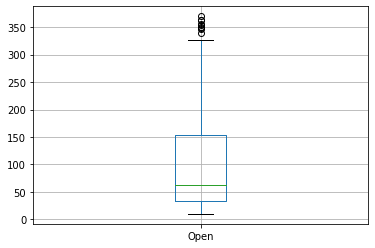

In [16]:
Dataset.boxplot('Open')

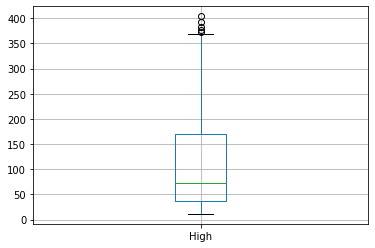

In [17]:
Dataset.boxplot('High')

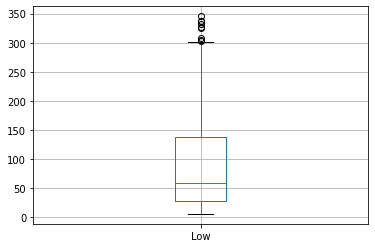

In [18]:
Dataset.boxplot('Low')

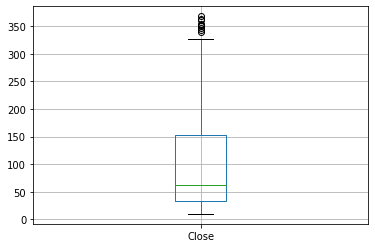

In [19]:
Dataset.boxplot('Close')

# **Exploratory Data Analysis**

**Dependent variable of close price of stock**

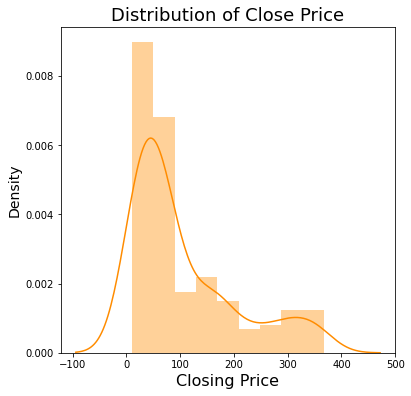

In [20]:
# depndent variable is 'Close'
# Normal Distribution

plt.figure(figsize = (6,6))
sns.distplot(Dataset['Close'], color = 'DarkOrange')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It is Right Skewed Distirbution

Log Transformation :- Transform the response variable from y to log(y)

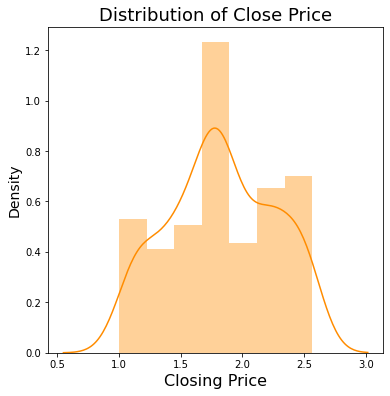

In [23]:
# Distribution plot of closing price For applying log transformation

plt.figure(figsize = (6,6))
sns.distplot(np.log10(Dataset['Close']), color = 'DarkOrange')
plt.title('Distribution of Close Price', fontsize=18)
plt.xlabel('Closing Price', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


**Independent Variable Open , High and Low price of stock**

**Plotting distribution for numerical Features**





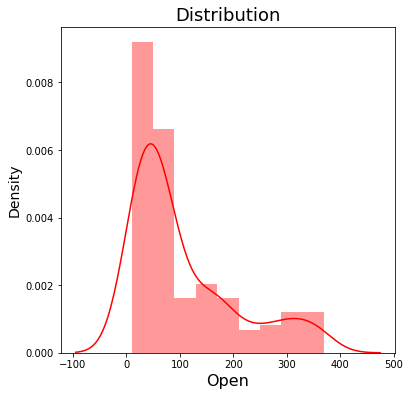

In [22]:
# ploting for Distribution of 'open' Feature

plt.figure(figsize = (6,6))
sns.distplot(Dataset['Open'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


It looks for numerical features are rightly skewed.

Apply log transformation to make normal.

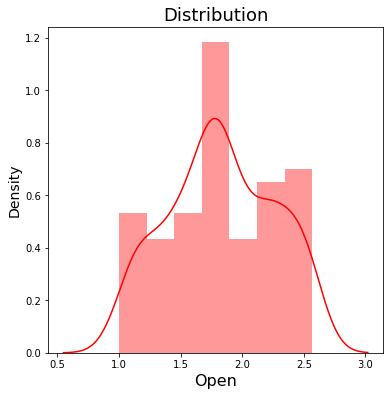

In [24]:
# log transformation for 'open' feature

plt.figure(figsize = (6,6))
sns.distplot(np.log10(Dataset['Open']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Open', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks like Normally Distributed of open Feature

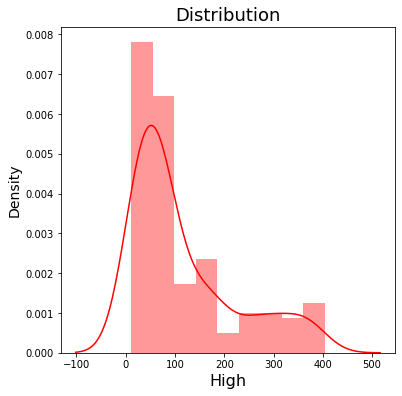

In [25]:
# ploting for Distribution of 'high' Feature

plt.figure(figsize = (6,6))
sns.distplot(Dataset['High'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()


It looks for numerical features are rightly skewed.

Apply log transformation to make normal. 

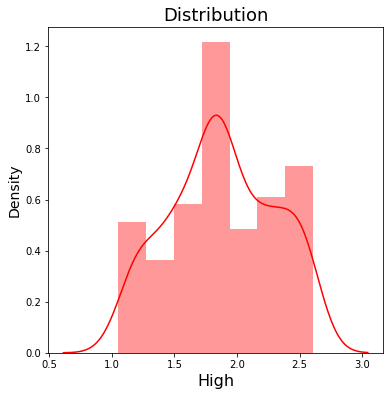

In [26]:
# Log Transformation of 'High' Feature

plt.figure(figsize = (6,6))
sns.distplot(np.log10(Dataset['High']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('High', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks like Normally Distributed of High Feature

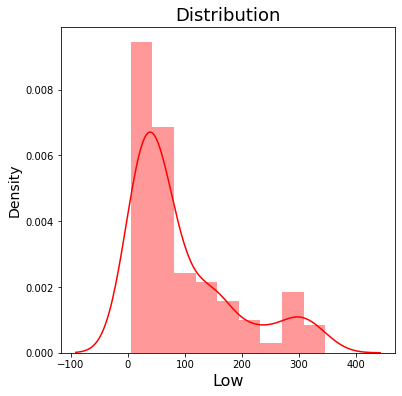

In [27]:
# for Normal Distribution
# ploting for Distribution of 'Low' Feature

plt.figure(figsize = (6,6))
sns.distplot(Dataset['Low'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks for numerical features are rightly skewed.

Apply log transformation to make normal.

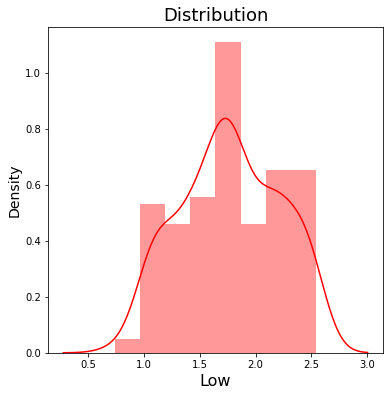

In [28]:
# Log Transformation of 'low' feature 
plt.figure(figsize = (6,6))
sns.distplot(np.log10(Dataset['Low']), color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Low', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

It looks like Normally Distributed of Low Feature

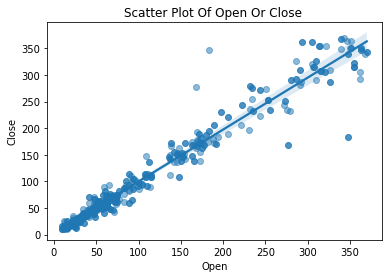

In [29]:
# Now find out the realation between the Dependent Variable and independent Variable
# scatter plot with Best Fit line

plt.scatter(Dataset['Close'], Dataset['Open'], alpha=0.5)
plt.title('Scatter Plot Of Open Or Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='Open', y = 'Close', data= Dataset)
plt.show()

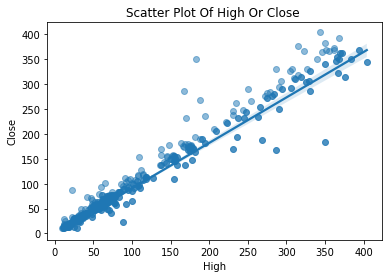

In [30]:
plt.scatter(Dataset['Close'], Dataset['High'], alpha=0.5)
plt.title('Scatter Plot Of High Or Close ')
plt.xlabel('Open')
plt.ylabel('Class')
sns.regplot(x ='High', y = 'Close', data= Dataset)
plt.show()

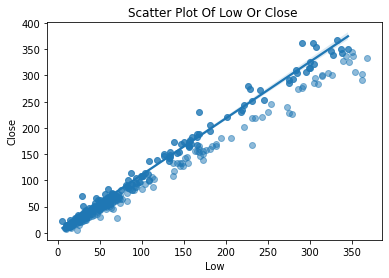

In [31]:
plt.scatter(Dataset['Close'], Dataset['Low'], alpha=0.5)
plt.title('Scatter Plot Of Low Or Close ')
plt.xlabel('Low')
plt.ylabel('Class')
sns.regplot(x ='Low', y = 'Close', data= Dataset)
plt.show()

# **Correlation**

#### Now, we will see the correlation between all the features in our data set

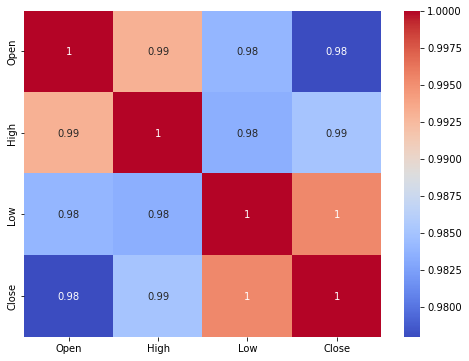

In [32]:
# let's find out correlation with Heatmap
# correlation
plt.figure(figsize=(8,6))
correlation = Dataset.corr()
sns.heatmap(abs(correlation), annot = True, cmap='coolwarm')

Here, all variables shows the highest correlation among them

In [33]:
# multicorrelinearity
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def cal_vif(X):

  # calculating VIF
  vif =pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X. shape[1])]

  return(vif)


In [34]:
cal_vif(Dataset[[i for i in Dataset.describe().columns if i not in ['Date', 'Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


Even though we have high VIF scores, we will not perform feature engineering because for this particular use case, each feature is important. In the real world, most indicators take into account each of these features to predict future values

We have the very High VIF of Open, High, Low fetures in our dataset so we have to drop them which is least correlated with dependent variable

In [35]:
# Here we will drop the open feature from the VIF matrix
cal_vif(Dataset[[i for i in Dataset.describe().columns if i not in ['Date', 'Close','Open']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


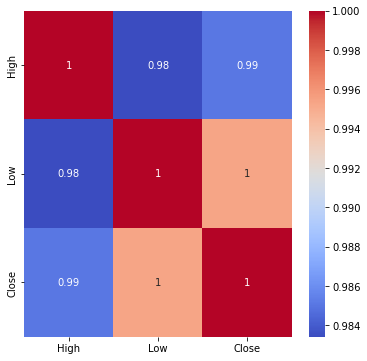

In [36]:
# after drop the oepn feture from the VIF matrix
# Correaltion of heatmap

plt.figure(figsize=(6,6))
sns.heatmap(Dataset[['High','Low','Close']].corr(), annot= True, cmap= 'coolwarm')
plt.show()

We have dropped 3 features from our dataset because it can effect our model efficiency but neglecting high VIF is far more dangerous than dropping features.

So, we preferred to drop the features and move forward with the Low Variable.

# **Train Test Split**

Splitting Data

X = Independent Variable

y = Dependent Variable

In [37]:
# Splitting our data into Dependent and Independent Variables
X = Dataset.drop(columns=['Close','Date'])
y = Dataset['Close']

In [38]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

In [39]:
# splitting the dadaset into the training set and test set 
# splitting the Train test data with 80 - 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [40]:
# Shape of the Training dataset
print(X_train.shape)

(148, 3)


In [41]:
# Shape of the Test dataset
print(X_test.shape)

(37, 3)


In [42]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 we build 4 regression models for our data.
* Linear Regression
* Lasso Rigression
* Ridge Rigression
* Elastic Net Regression

# **Linear Regression**

The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.

In [43]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [44]:
#train accuracy of linear regression model
round(regressor.score(X_train,y_train), 4)

0.8147

In [45]:
# Test accuracy of linear regression model
round(regressor.score(X_test, y_test), 4)

0.8226

In [46]:
# prediction of test data
y_pred = regressor.predict(X_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [47]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [48]:
# creating the DataFrame of test and train Dataset
train_Dataset = pd.DataFrame(X_train,y_train)
test_Dataset = pd.DataFrame(10**y_test)
test_Dataset.rename(columns= {'Close' :'Actual Closing Price'}, inplace =True)

In [49]:
test_Dataset['Predicted Closing Price']= 10**y_pred
test_Dataset.head()

,Actual Closing Price,Predicted Closing Price
16,25.32,32.914467
179,25.60,34.050099
66,52.59,43.170817
40,12.26,29.880891
166,147.95,103.446210


In [50]:
# Test Performance of Linear Regregression

print("MSE :", round(mean_squared_error(y_test, y_pred), 4))
print("RMSE :", round(math.sqrt(mean_squared_error(y_test, y_pred)), 4)) 
print("MAE :", round(mean_absolute_error(y_test, y_pred), 4))
print("MAPE :", round(mean_absolute_percentage_error(y_test, y_pred), 4))
print("r2 :", round(r2_score(y_test, y_pred),4))

MSE : 0.0316
RMSE : 0.1777
MAE : 0.1513
MAPE : 0.0954
r2 : 0.8226


Text(0, 0.5, 'Predicted test value')

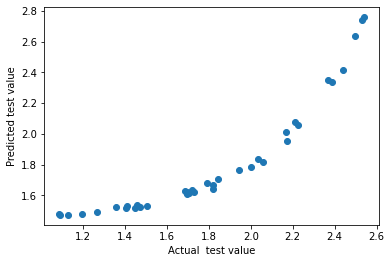

In [51]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual  test value')
plt.ylabel('Predicted test value')

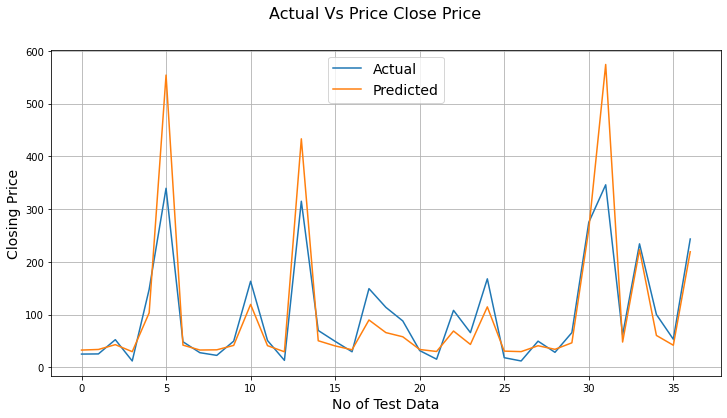

In [52]:
# Actual Price vs predicted price for Linear Regression plot
plt.figure(figsize=(12,6))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred))
plt.suptitle('Actual Vs Price Close Price', fontsize =16)
plt.legend(['Actual', 'Predicted'], fontsize = 14)
plt.xlabel('No of Test Data', fontsize= 14)
plt.ylabel('Closing Price', fontsize= 14)
plt.grid()

# **Implementing Lasso Regression**

In [53]:
# fit data into Lasso regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.005, max_iter = 3000)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.005, max_iter=3000)

In [54]:
round(lasso.score(X_train, y_train), 4)

0.8126

In [55]:
y_pred_lasso = lasso.predict(X_test)

In [56]:
y_pred_lasso

array([1.53168982, 1.54626433, 1.64772636, 1.49274256, 2.00936688,
       2.70568011, 1.64049984, 1.53226521, 1.54014459, 1.63199019,
       2.06835968, 1.62551073, 1.49038208, 2.59859084, 1.71090087,
       1.62196586, 1.53924848, 1.95160324, 1.81420729, 1.76583684,
       1.54650943, 1.49845368, 1.83941542, 1.64493997, 2.04922943,
       1.50676826, 1.49408116, 1.62334947, 1.5500453 , 1.67959931,
       2.38074349, 2.72386965, 1.69275547, 2.33070315, 1.78213011,
       1.63392977, 2.31195507])

In [57]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [58]:
# Test Performance of lasso regression model

print("MSE :",round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.0326
RMSE : 0.1806
MAE : 0.1535
MAPE : 0.0978
R2 : 0.8168


Text(0, 0.5, 'Predicted Value')

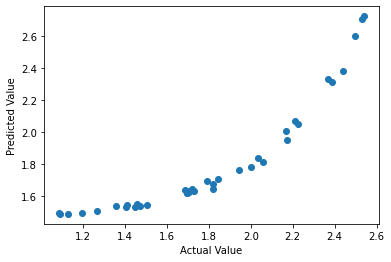

In [59]:
plt.scatter((y_test), (y_pred_lasso))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

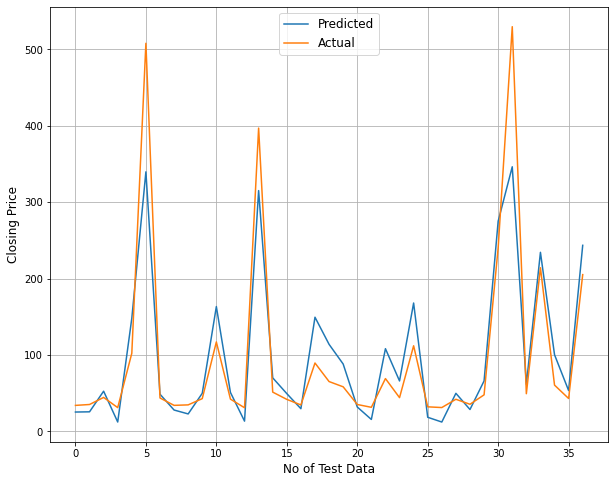

In [60]:
# Actual price vs predicted price for lasso regression ploting
plt.figure(figsize= (10,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.legend(['Predicted', 'Actual'], fontsize = 12)
plt.xlabel('No of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize = 12)
plt.grid()

# **Implemeting Cross Validation of Lasso**

In [61]:
# Importing GridSearch
from sklearn.model_selection import GridSearchCV

In [62]:
# Hyper parameter of Tuning For Lasso Regression

lasso =Lasso()
parameters ={'alpha': [1e-15, 1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters,scoring = 'neg_mean_squared_error', cv = 3, return_train_score=True)
lasso_regressor.fit(X_train, y_train) 


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [63]:
print(" The best Fit alpha value is found out to be :", round(lasso_regressor.best_params_['alpha'], 4))
print(" The negative mean squared error is : ", round(lasso_regressor. best_score_,4))

 The best Fit alpha value is found out to be : 0.001
 The negative mean squared error is :  -0.0352


In [64]:
# Prediction of test data .
y_pred_lasso = lasso_regressor.predict(X_test)
y_pred_lasso

array([1.51948517, 1.53474676, 1.64008318, 1.47887097, 2.01529694,
       2.7437218 , 1.63177602, 1.51986028, 1.52812486, 1.62387701,
       2.07832179, 1.61758243, 1.47681346, 2.63226656, 1.70654748,
       1.61353024, 1.52730079, 1.95658217, 1.81264649, 1.76336203,
       1.53486131, 1.48494559, 1.84017341, 1.63671799, 2.05886139,
       1.49383792, 1.48024548, 1.61501616, 1.53873718, 1.67352788,
       2.40238239, 2.76153997, 1.68698106, 2.35080149, 1.78006184,
       1.62620093, 2.33253503])

In [65]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [66]:
# Test performance

print("MSE :", round(mean_squared_error(y_test, y_pred_lasso), 4))
print("RMSE :", round(math.sqrt(mean_squared_error(y_test, y_pred_lasso)), 4))
print("MAE :", round(mean_absolute_error(y_test, y_pred_lasso), 4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_lasso), 4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 0.032
RMSE : 0.1789
MAE : 0.1522
MAPE : 0.0961
R2 : 0.8202


Text(0, 0.5, 'Predicted Value')

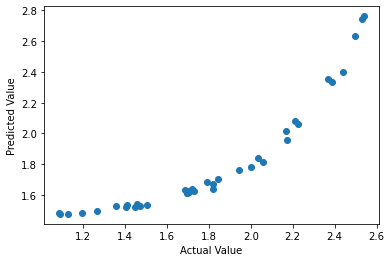

In [67]:
plt.scatter((y_test),(y_pred_lasso))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

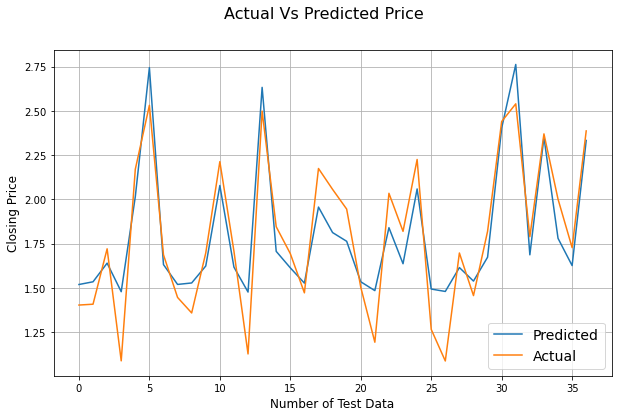

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.suptitle('Actual Vs Predicted Price', fontsize= 16)
plt.legend(["Predicted","Actual"], fontsize=14)
plt.xlabel('Number of Test Data', fontsize =12)
plt.ylabel('Closing Price', fontsize =12)
plt.grid()

# **Implementing Ridge Regression**

In [ ]:
# fit data into ridge regression
from sklearn.linear_model import Ridge

ridge = Ridge (alpha= 0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [ ]:
# Accuracy of Ridge regression model
round(ridge.score(X_train, y_train), 4)

0.8141

In [ ]:
# prediction of test data
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge

array([1.51681675, 1.53255024, 1.64135134, 1.47687218, 2.01963705,
       2.75155235, 1.63473225, 1.51693004, 1.52773879, 1.62318793,
       2.08158597, 1.61542024, 1.47455115, 2.63508426, 1.70593368,
       1.61278434, 1.52495118, 1.95973505, 1.80785023, 1.76121244,
       1.53334058, 1.48368101, 1.84037593, 1.6326748 , 2.05955474,
       1.49175569, 1.47829991, 1.6125058 , 1.53709372, 1.67458833,
       2.39845583, 2.77299789, 1.68838401, 2.35904715, 1.77719596,
       1.62440651, 2.33055613])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Test Performance
print("MSE:", round(mean_squared_error (y_test, y_pred_ridge), 4))
print("RMSE:", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge)), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred_ridge), 4))
print("MAPE:", round(mean_absolute_percentage_error(y_test, y_pred_ridge), 4))
print("R2 :", round(r2_score(y_test, y_pred_ridge), 4))

MSE: 0.0321
RMSE: 0.1791
MAE: 0.1522
MAPE: 0.0959
R2 : 0.8197


Text(0, 0.5, 'Predicted Value')

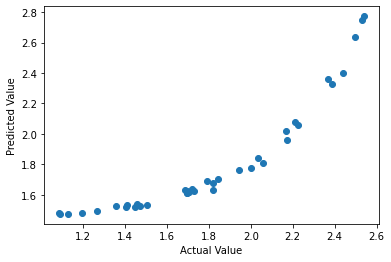

In [ ]:
plt.scatter((y_test),(y_pred_ridge))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

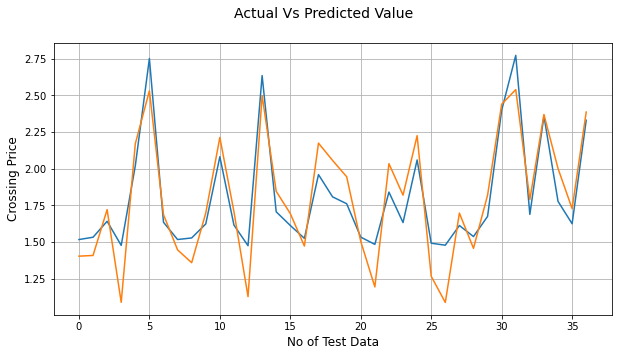

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.suptitle('Actual Vs Predicted Value', fontsize= 14)
plt.xlabel('No of Test Data', fontsize = 12)
plt.ylabel('Crossing Price', fontsize= 12)
plt.grid()

# **Implementing Cross Validation Of Ridge**

In [ ]:
# Hyperparameter of tunning

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-13, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv=3)

In [ ]:
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print(" The Best Fit Alpha Value is found out to be :", ridge_regressor.best_params_['alpha'])
print(" The negative mean squared error for is :", round(ridge_regressor.best_score_, 3))

 The Best Fit Alpha Value is found out to be : 1
 The negative mean squared error for is : -0.035


In [ ]:
# Model Prediction
y_pred_ridge1 = ridge_regressor.predict(X_test)
y_pred_ridge1


array([1.52363934, 1.53950359, 1.65147831, 1.48676803, 2.02341628,
       2.7257897 , 1.65011276, 1.52368738, 1.53901778, 1.62976844,
       2.07741879, 1.61843866, 1.48318818, 2.60390027, 1.70828562,
       1.61948309, 1.53219564, 1.96060489, 1.80076803, 1.75906672,
       1.54190217, 1.49450483, 1.83932752, 1.63349981, 2.05019403,
       1.50013616, 1.48828434, 1.61559809, 1.54485816, 1.68242956,
       2.36963964, 2.75593021, 1.69685984, 2.35505327, 1.77352279,
       1.62810209, 2.30469895])

In [ ]:
np.array(y_test)

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
# Test Performance

print("MSE:", round(mean_squared_error (y_test, y_pred_ridge1), 4))
print("RMSE:", round(math.sqrt(mean_squared_error (y_test, y_pred_ridge1)), 4))
print("MAE:", round(mean_absolute_error(y_test, y_pred_ridge1), 4))
print("MAPE:", round(mean_absolute_percentage_error(y_test, y_pred_ridge1), 4))
print("R2 :", round(r2_score(y_test, y_pred_ridge1), 4))

MSE: 0.0327
RMSE: 0.1808
MAE: 0.1534
MAPE: 0.0971
R2 : 0.8164


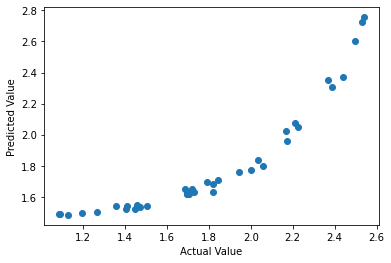

In [ ]:
plt.scatter((y_test), (y_pred_ridge1))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()

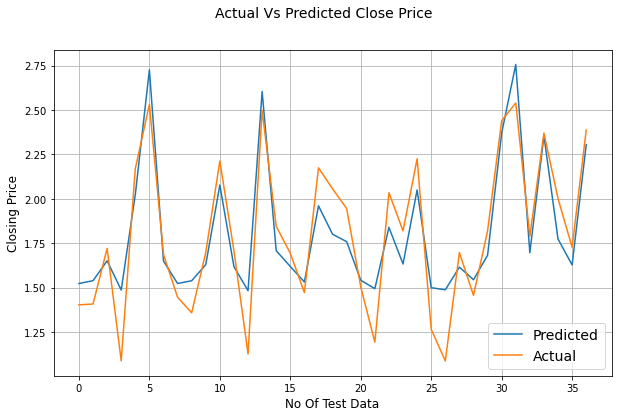

In [ ]:
# actual Price Vs Predicted Price for ridge regression

plt.figure(figsize=(10,6))
plt.plot(y_pred_ridge1)
plt.plot(np.array(y_test))
plt.suptitle('Actual Vs Predicted Close Price', fontsize = 14)
plt.legend(['Predicted','Actual'], fontsize = 14)
plt.xlabel('No Of Test Data', fontsize= 12)
plt.ylabel('Closing Price', fontsize= 12)
plt.grid()

# **Implementing Elastic Net**

In [ ]:
#fitting data into Elastic Net
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1,l1_ratio=0.05)
elastic_model = elastic.fit(X_train,y_train)

In [ ]:
elastic.score(X_train,y_train)

0.721

In [ ]:
y_pred_elastic = elastic.predict(X_test)

In [ ]:
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic),3))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 3))

MSE : 0.051
RMSE : 0.226
MAE : 0.182
MAPE : 0.118
R2 : 0.714


Text(0, 0.5, 'Predicted Value')

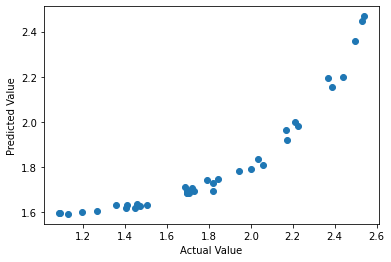

In [ ]:
plt.scatter((y_test),(y_pred_elastic))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

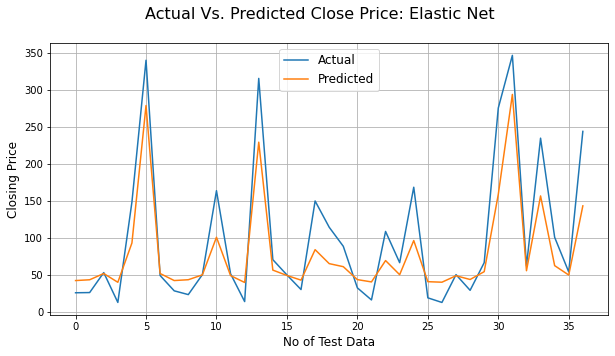

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **Implementing Cross Validation of Elastic Net**

In [ ]:
# Hyper-Parameter Tuning for Elastic Net

elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model_cv = GridSearchCV(elastic_cv,parameters,scoring='neg_mean_squared_error',cv=3)

In [ ]:
elastic_model_cv.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model_cv.best_params_['alpha'], elastic_model_cv.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model_cv.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 0.001 1
The negative mean squared error for is:  -0.035


In [ ]:
y_pred_elastic_cv = elastic_model_cv.predict(X_test)
y_pred_elastic_cv

array([1.51948517, 1.53474676, 1.64008318, 1.47887097, 2.01529694,
       2.7437218 , 1.63177602, 1.51986028, 1.52812486, 1.62387701,
       2.07832179, 1.61758243, 1.47681346, 2.63226656, 1.70654748,
       1.61353024, 1.52730079, 1.95658217, 1.81264649, 1.76336203,
       1.53486131, 1.48494559, 1.84017341, 1.63671799, 2.05886139,
       1.49383792, 1.48024548, 1.61501616, 1.53873718, 1.67352788,
       2.40238239, 2.76153997, 1.68698106, 2.35080149, 1.78006184,
       1.62620093, 2.33253503])

In [ ]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic_cv),4))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred_elastic_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic_cv), 4))

MSE : 0.032
RMSE : 0.1789
MAE : 0.1522
MAPE : 0.0961
R2 : 0.8202


Text(0, 0.5, 'Predicted Value')

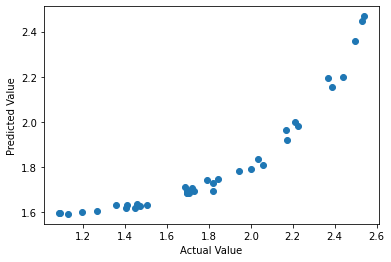

In [ ]:
plt.scatter((y_test),(y_pred_elastic))
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')

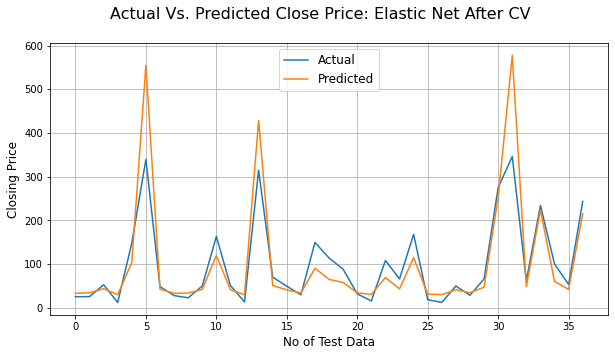

In [ ]:
# Actual Price vs. Predicted Price for Elastic Net after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic_cv))
plt.suptitle('Actual Vs. Predicted Close Price: Elastic Net After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.grid()

# **Conclusion**

1. The popularity of stock closing is growing extremely rapidly day by day   which encourage researcher to find new methods if any fraud happens.

2. This technique is used for prediction is not only helpful to researchers to predict future stock closing prices or any fraud happen or not but also helps investors or any person who dealing with the stock market in order to prediction of model with good accuracy.

3. In this work we use linear regression technique, lasso regression, ridge regression and elastic net regression technique. these four models gives us the following results

4. High, low, open are directly correlate with the closing price of stocks

5. Target variable(dependent variable) strongly dependent on independent variables

6. We get maximum accuracy of 82%
